In [73]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Read in Data and Explore Data Structure

In [74]:
df= pd.read_csv('../Data/heart.csv')
df.head().style.background_gradient(cmap="Set3")

* Catagorical features are the columns in grey.

* Numerical features are the columns that are coloured.

In [75]:
# Exploring the strcture of the data frame
def DataExploration(data):
    # Print head of data
    print(f"\033[1mHead:\033[0m\n{data.head()}\n")
    
    # Print information about data
    print(f"\033[1mInformation:\033[0m")
    print(f"{data.info()}\n")
    
    # Print data types
    print(f"\033[1mData Types:\033[0m\n{data.dtypes}\n")
   
    # Print null and missing values
    print(f"\033[1mNull Values:\033[0m\n{data.isna().sum()}\n")
    print(f"\033[1mMissing Values:\033[0m\n{data.isnull().sum()}\n")
    
    # Print shape of data
    print(f"\033[1mData Shape:\033[0m\n{data.shape}\n")
DataExploration(df)

Head:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  

#### Quick exploration of our data set shows that there are no missing or null values.

# 2. Data Analysis 

## <span style="color:blue">Counts and Percentages of HeartDisease</span>

In [76]:
# Get the counts and percentages of HeartDisease
heart_disease_counts = df['HeartDisease'].value_counts()
heart_disease_percents = heart_disease_counts / len(df) * 100

# Count and percentage of HeartDisease values
count = df['HeartDisease'].value_counts()
percentage = df['HeartDisease'].value_counts(normalize=True) * 100

# Format the prints
print('{:<20} {:<10} {:<10}'.format('', 'Count', 'Percentage'))
print('{:<20} {:<10} {:<10.2f}%'.format('No Heart Disease (0)', count[0], percentage[0]))
print('{:<20} {:<10} {:<10.2f}%'.format('Heart Disease (1)', count[1], percentage[1]))

                     Count      Percentage
No Heart Disease (0) 410        44.66     %
Heart Disease (1)    508        55.34     %


In [77]:
# Convert all 'M' and 'F' values in the 'Sex' column to uppercase
df['Sex'] = df['Sex'].str.upper()

# Compute the number and percentage of males and females in the dataset
total_count = len(df)
male_count = (df['Sex'] == 'M').sum()
female_count = (df['Sex'] == 'F').sum()

male_percent = male_count / total_count * 100
female_percent = female_count / total_count * 100

print(f'Number of males: {male_count} ({male_percent:.2f}%)')
print(f'Number of females: {female_count} ({female_percent:.2f}%)')

Number of males: 725 (78.98%)
Number of females: 193 (21.02%)


## <span style="color:blue">Mean Values of the Features</span>

In [78]:
# Lets look at the mean values of the features of our data set 
# 0 means no heart disese and 1 means the patient haas heart disease.
yes = df[df['HeartDisease'] == 1].describe().T[['mean', 'std']]
yes.columns = ['Heart Disease Mean', 'Heart Disease std']

no = df[df['HeartDisease'] == 0].describe().T[['mean', 'std']]
no.columns = ['No Heart Disease Mean', 'No Heart Disease Std']

result = pd.concat([yes, no], axis=1)
result.style.background_gradient(cmap = 'Set3')

## <span style="color:blue">Feature Distributions</span>

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

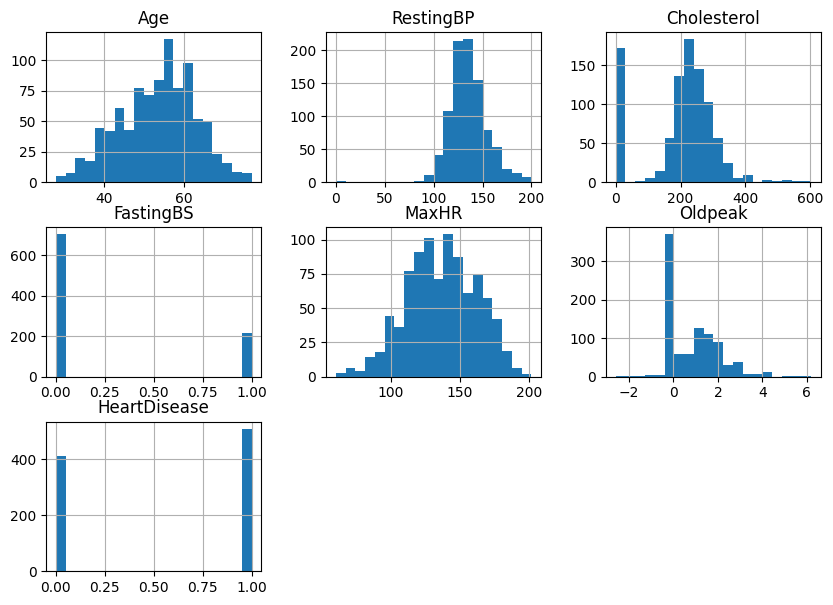

In [79]:
df.hist(bins=20, figsize=(10, 7))

* The age, MaxHR, and restingBP are all normally distrubuted 
* The Cholesterol data has a bimodal distribution 
* Oldpeak distribution is positively skewed 

## <span style="color:blue">Correlations</span>

<Axes: >

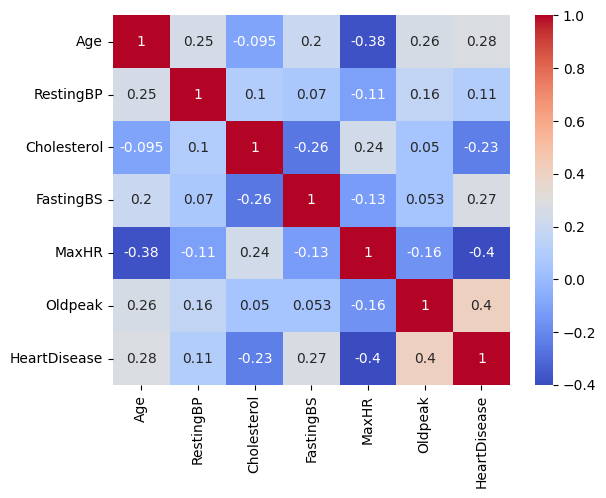

In [90]:
df_corr = df.drop(columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [81]:
import plotly.graph_objects as go
import plotly.express as px
colors = ['red','blue']

labels = [x for x in df.Sex.value_counts().index]
values = df[df['HeartDisease'] == 1]['Sex'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.06, 0])])
fig.update_traces(marker=dict(colors=colors))
fig.show()

# 3. Machine Learning Preprocessing 

## <span style="color:blue">Label Encoder using Scikit-Learn</span>


* Performing label encoding on categorical features is important because machine learning algorithms typically work with numerical data. Label encoding allows us to convert categorical data into numerical data that can be used as input for machine learning algorithms.
<br>

* It is also important to create a deep copy of the data before performing any data transformations because making changes to the original data can cause unexpected issues and make it difficult to track changes. Creating a deep copy ensures that the original data is preserved and any changes are made to a separate copy of the data.
<br>

Label encoding is typically applied to categorical features that have a finite set of possible values or categories. These features cannot be directly used as input to machine learning algorithms, as the algorithms usually expect numerical input data.

In contrast, numerical features such as `Age', 'Cholesterol', 'RestingBP', 'FastingBS', 'Oldpeak', and 'MaxHR` can be directly used as input to machine learning algorithms without the need for encoding.

Therefore, we apply label encoding to only the categorical features in the dataset, and leave the numerical features as they are.

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_ML = df.copy(deep = True)

df_ML['Sex'] = le.fit_transform(df['Sex'])
df_ML['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df_ML['RestingECG'] = le.fit_transform(df['RestingECG'])
df_ML['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df_ML['ST_Slope'] = le.fit_transform(df['ST_Slope'])

## <span style="color:blue">Feature Scaling</span>

We typically have two options for scaling data: normalization and standardization.

* Normalization is used to scale features that do not display a normal (Gaussian) distribution. This technique is used to adjust the values of features that have different ranges of values.

   In our dataset, the 'Oldpeak' feature has a right-skewed data distribution and thus normalization is applied to this feature.
<br>

* Standardization is used to scale features that are normally distributed but may have different ranges of values. Standardization transforms the data to have a mean of 0 and a standard deviation of 1, allowing for better comparison between the features.

  In our dataset, the 'Age', 'RestingBP', 'Cholesterol', and 'MaxHR' features are normally distributed, and thus standardization is applied to these features.

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object for normalization
min_max_scaler = MinMaxScaler()
df_ML['Oldpeak'] = min_max_scaler.fit_transform(df_ML[['Oldpeak']])

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Features to be scaled
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a StandardScaler object for standardization
scaler = StandardScaler()

# Create a MinMaxScaler object for normalization
min_max_scaler = MinMaxScaler()

# Apply standardization and normalization to the features
df_ML[features] = scaler.fit_transform(df_ML[features])
df_ML['Oldpeak'] = min_max_scaler.fit_transform(df_ML[['Oldpeak']])
df_ML.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.433140    1              1   0.410909     0.825070          0   
1 -0.478484    0              2   1.491752    -0.171961          0   
2 -1.751359    1              1  -0.129513     0.770188          0   
3 -0.584556    0              0   0.302825     0.139040          0   
4  0.051881    1              2   0.951331    -0.034755          0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0           1  1.382928               0  0.295455         2             0  
1           1  0.754157               0  0.409091         1             1  
2           2 -1.525138               0  0.295455         2             0  
3           1 -1.132156               1  0.465909         1             1  
4           1 -0.581981               0  0.295455         2             0

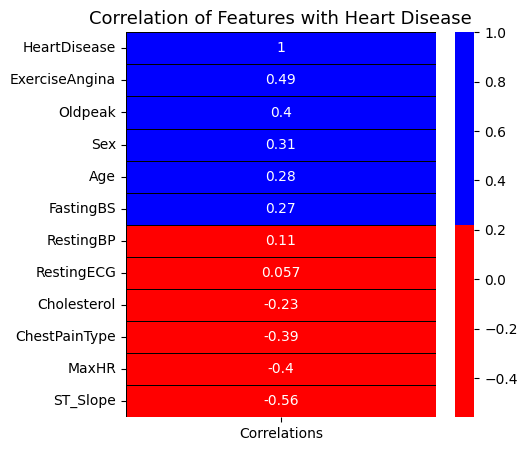

In [51]:
corr = df_ML.corrwith(df_ML['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
colors = ['r', 'b']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation of Features with Heart Disease', size=13);
plt.show()

### Chi^2 anlysis for catagorical features
Performing a chi-squared analysis can be a useful technique for feature selection when dealing with categorical data. It helps identify the most important features by testing the independence between each feature and the target variable.

The chi-squared test measures the difference between the observed distribution of a categorical variable and the expected distribution, assuming the null hypothesis that there is no relationship between the variable and the target. A feature with a high chi-squared score indicates that it is more likely to be related to the target variable and can be a good predictor.

By applying the chi-squared test to each feature in the dataset, you can identify the features that are most strongly associated with the target variable and use them as input features for your machine learning model. This can help you reduce the number of features in your dataset, simplify the model, and improve its accuracy and generalisation performance.

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

In [52]:
categorical_cols= df.select_dtypes(include=['object'])
categorical_features=categorical_cols.columns

features = df.loc[:,categorical_features[:-1]]
target = df.loc[:,categorical_features[-1]]

In [53]:
from sklearn.feature_selection import SelectKBest, chi2

# Create new dataframe with selected categorical features
cat_df = df_ML[['ExerciseAngina', 'ChestPainType', 'Sex', 'RestingECG']].copy()

# Converting categorical features to numerical using LabelEncoder was performed at the beggining of the modelling 

# Apply chi-squared test to select the best features
selector = SelectKBest(chi2, k='all')
selector.fit(cat_df, df_ML['HeartDisease'])
selected_features = cat_df.columns[selector.get_support()]

feature_scores = pd.DataFrame({'Feature': cat_df.columns, 'Score': selector.scores_})
print(feature_scores)

          Feature       Score
0  ExerciseAngina  133.640134
1   ChestPainType  160.736878
2             Sex   18.006243
3      RestingECG    1.218136


### ANOVA F-test
The ANOVA F-test computes a score for each feature, which measures the degree of linear relationship between the feature and the target variable. A higher score indicates a stronger correlation between the feature and the target variable.

In [54]:
from sklearn.feature_selection import f_regression

# Select numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Select target variable
target = df_ML['HeartDisease']

# Perform feature selection using ANOVA F-test
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(df_ML[numerical_features], target)

# Create dataframe of feature scores
feature_scores = pd.DataFrame(data=fit.scores_, index=numerical_features, columns=['ANOVA Score'])

# Print the feature scores in descending order
print(feature_scores.sort_values(by='ANOVA Score', ascending=False))

             ANOVA Score
Oldpeak       178.615120
MaxHR         174.913585
Age            79.160779
FastingBS      70.478543
Cholesterol    52.459725
RestingBP      10.727228


#### From the results of the feature selction phase we will exclude Resting ECG and Resting BP from our mahcine learning model

# 4. Machine Learning Modelling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [56]:
# Randomly split the 'X' and 'y' datasets into training and testing sets
# Firstly drop features that arent going to be used in or model
features = df_ML[df_ML.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values

# Set target variable
target_variable = df_ML['HeartDisease'].values

x_train, x_test, y_train, y_test = train_test_split(features, target_variable, test_size = 0.25, random_state = 35)

## <span style="color:blue">Model Evaluating Function</span>

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


def model_evaluation(classifier, X_test, y_test):
    # Predict labels for the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total = tn + fp + fn + tp
    tnpct = (tn / total) * 100
    fppct = (fp / total) * 100
    fnpct = (fn / total) * 100
    tppct = (tp / total) * 100
    
    # Print evaluation metrics and confusion matrix
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))
    print("\nConfusion Matrix:")
    print("TN: {} ({:.2f}%)".format(tn, tnpct))
    print("FP: {} ({:.2f}%)".format(fp, fppct))
    print("FN: {} ({:.2f}%)".format(fn, fnpct))
    print("TP: {} ({:.2f}%)".format(tp, tppct))

## <span style="color:blue">Decision Tree Classifier</span>

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier and train on the training set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# Evaluate the model using the test set and the model_evaluation function
model_evaluation(dt, x_test, y_test)



Accuracy: 0.81
Precision: 0.84
Recall: 0.83
F1 Score: 0.84

Confusion Matrix:
TN: 74 (32.17%)
FP: 21 (9.13%)
FN: 23 (10.00%)
TP: 112 (48.70%)


## <span style="color:blue"> KNN </span>

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
knn.fit(x_train, y_train)

# Evaluate the performance of the classifier using the model_evaluation function
model_evaluation(knn, x_test, y_test)


Accuracy: 0.82
Precision: 0.83
Recall: 0.86
F1 Score: 0.85

Confusion Matrix:
TN: 72 (31.30%)
FP: 23 (10.00%)
FN: 19 (8.26%)
TP: 116 (50.43%)


## <span style="color:blue">Naive Bayes</span>

In [60]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the classifier on the training set
nb.fit(x_train, y_train)

# Evaluate the performance of the classifier using the model_evaluation function
model_evaluation(nb, x_test, y_test)


Accuracy: 0.85
Precision: 0.87
Recall: 0.87
F1 Score: 0.87

Confusion Matrix:
TN: 78 (33.91%)
FP: 17 (7.39%)
FN: 17 (7.39%)
TP: 118 (51.30%)


## <span style="color:blue">Logistic Regression</span>

In [61]:
from sklearn.linear_model import LogisticRegression

# Create an instance of logistic regression classifier
log_model = LogisticRegression(max_iter=1000)

# Train the classifier on the training set
log_model.fit(x_train, y_train)

# Evaluate the performance of the classifier using the model_evaluation function
model_evaluation(log_model, x_test, y_test)


Accuracy: 0.84
Precision: 0.88
Recall: 0.84
F1 Score: 0.86

Confusion Matrix:
TN: 79 (34.35%)
FP: 16 (6.96%)
FN: 21 (9.13%)
TP: 114 (49.57%)


In [62]:
# Model names
models = ['Decision Tree', 'KNN', 'Naive Bayes', 'Logistic Regression']

# Accuracy scores and f1 scores
accuracy_scores = [0.81, 0.82, 0.85, 0.84]
f1_scores = [0.84, 0.85, 0.87, 0.86]

# Dictionary of the scores
scores_dict = {'Model': models, 'Accuracy': accuracy_scores, 'F1 Score': f1_scores}

# Create a pandas dataframe from the dictionary
scores_df = pd.DataFrame(scores_dict)

scores_df.style.background_gradient(cmap="Set3")


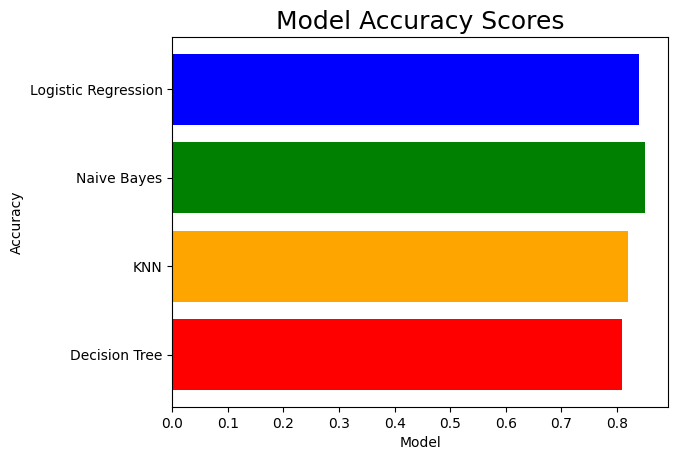

In [63]:
fig, ax = plt.subplots()
ax.barh(models, accuracy_scores, color=['r','orange', 'green', 'b'])

# set title and labels
ax.set_title('Model Accuracy Scores', size=18)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

# display the plot
plt.savefig('Model_Accuracy_Score.pdf')
plt.show()

The Naive Bayes Model had the highes accuracy and F1 score.

<br> 

## ROC curve:

The ROC curve displays the performance of a classification model at all classification thresholds. It plots the true positive rate vs the false positive rate

The true positive rate (TPRate) is given by,
$$TPRate = \frac{TP}{TP + TN}$$

The false positive rate (FPRate) is given by,
$$FPRate = \frac{FP}{FP + TN}$$

Better classifiers will produce an ROC curve that is closer to the top-left corner, therefore giving a larger AUC (area under the curve).

NameError: name 'plot_roc_curve' is not defined

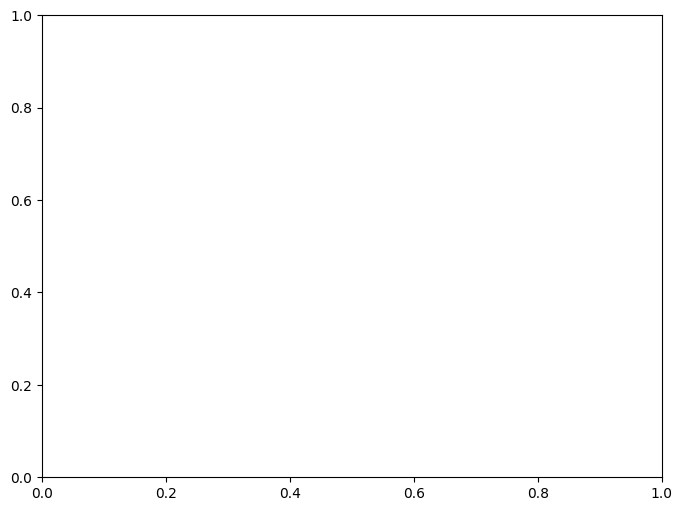

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_roc_curve(dt, x_test, y_test, ax=ax)
plot_roc_curve(knn, x_test, y_test, ax=ax)
plot_roc_curve(nb, x_test, y_test, ax=ax)
plot_roc_curve(log_model, x_test, y_test, ax=ax)

ax.set_title('ROC Curves')
ax.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The area under the ROC curve is 0.80, 0.88, 0.92, and 0.91 for the Decision Tree, K-NN, Naïve Bayes, and Logistic Regression classification models respectively. Therefore, the naïve bayes is a better classifier than the other two.

I was satisfied with the performance of the Naïve bayes classification model as normally an AUC of the ROC curve should be ≥ 0.85 to be considered a reliable classfier.

In [66]:
import sklearn
print(sklearn.__version__)

1.4.1.post1
